Before conv operation the Image Shape: (100, 100, 3)
After conv operation the Image Shape: (54, 54, 3)


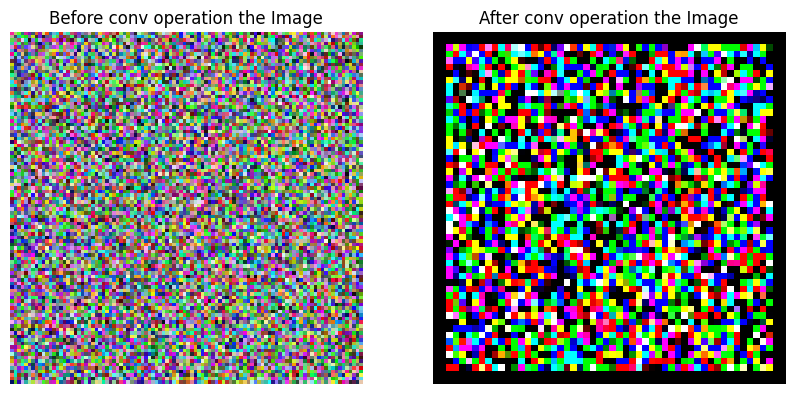

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided

def conv1d(image, kernel, stride, padding):

    # dimensions of kernel
    h_k, w_k = kernel.shape

    # dimensions of image
    h_i, w_i = image.shape

    # get padding size
    if padding == 'valid':
        h_pad = w_pad = 0
    elif padding == 'same':
        h_pad = (h_k - 1) // 2
        w_pad = (w_k - 1) // 2
    elif isinstance(padding, int):
        h_pad = w_pad = padding
    else:
        raise ValueError("invalid padding input given")

    # apply padding on image
    padded_img = np.pad(image, ((h_pad, h_pad), (w_pad, w_pad)), mode='constant', constant_values=0)

    # dimensions of padded img
    h_pi, w_pi = padded_img.shape

    # get output img dimensions using a standard formula
    oh = (h_pi - h_k) // stride + 1
    ow = (w_pi - w_k) // stride + 1

    # get patches by np.as_strided
    img_patch = as_strided(
        padded_img,shape=(oh, ow, h_k, w_k),
        strides=(padded_img.strides[0] * stride, padded_img.strides[1] * stride, padded_img.strides[0], padded_img.strides[1]),
        writeable=False)

    return np.sum(img_patch * kernel, axis=(2, 3))


def conv2d(img, kernel, stride, padding):

    # store the outputs which then combined later using np.stack
    conv_chan_list = [ conv1d(img[:, :, i], kernel, stride, padding)
        for i in range(3) ]

    return np.stack(conv_chan_list, axis=-1)


# get random 100*100*3 RGB image
img = np.random.rand(100, 100, 3)

# get Sharpening kernel
kernel = np.array([[0, -2, 0],
                   [-2, 7, -2],
                   [0, -2, 0]])

stride= 2 # kernel step size
padding= 5 # can take values of an int for custom padding or take string values of 'same', 'valid'
conv_img = conv2d(img, kernel, stride, padding)

# clip the values between 0-1
conv_img = np.clip(conv_img, 0, 1)

print("Before conv operation the Image Shape:", img.shape)
print("After conv operation the Image Shape:", conv_img.shape)

# visualizing the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title("Before conv operation the Image")
axes[0].axis("off")

axes[1].imshow(conv_img)
axes[1].set_title("After conv operation the Image")
axes[1].axis("off")

plt.show()